# Domain Adaptation with filters

* [ ] need to track time 

# Fourier Domain Adaption

In [12]:
import fda
import cv2
from skimage import io
from skimage.color import rgb2gray

import numpy as np

import matplotlib.pyplot as plt

if True:
    
    # Read source and target images
    
    #source_im = cv2.imread('example_data/AMD/A0001.jpg')
    #source_im = cv2.imread('example_data/nonAMD/N0001.jpg')
    
    source_img = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\images_Non-AMD\N0066.jpg')
    fundus  = source_img
    
    gray = fundus.mean(axis=0).mean(axis=0)
    
    fundus = cv2.copyMakeBorder(fundus, 400, 400, 400, 400, cv2.BORDER_CONSTANT, None, value = gray)
    
    fundus[np.where((fundus==[0,0,0]).all(axis=2))] = gray
    
    

    mask = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\Disc_Masks_bin\N0066.bmp')
    mask = cv2.copyMakeBorder(mask, 400, 400, 400, 400, cv2.BORDER_CONSTANT)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    num_labels, labels_im = cv2.findContours(mask, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)    
    if len(num_labels) > 0:
        max_area = max(num_labels, key = cv2.contourArea)
        cv2.drawContours(mask,[max_area],0,255,-1)
        # print(max_area)
    # calculate moments of binary image
    M = cv2.moments(mask)
    # calculate x, y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    #print(cX)
    #print(cY)

    # source_im = fundus[cY-700:cY+700, cX-700:cX+700]

    #source_im = cv2.imread('example_data/texture/ple.tif')
    target_im = cv2.imread('example_data/texture/cir.tif')
    
    source_im = cv2.resize(source_im, (500, 500), interpolation = cv2.INTER_AREA) # structure
    target_im = cv2.resize(target_im, (500, 500), interpolation = cv2.INTER_AREA) # style 

    
    # Perform domain adaptation
    if True:
        adapted_im = fda.fda(source_im, target_im, beta=0.005)
        adapted_im2 = fda.fda(target_im, source_im, beta=0.005)
    else:
        adapted_im = source_im
        adapted_im2 = target_im
        
    
    
    

<Figure size 432x288 with 0 Axes>

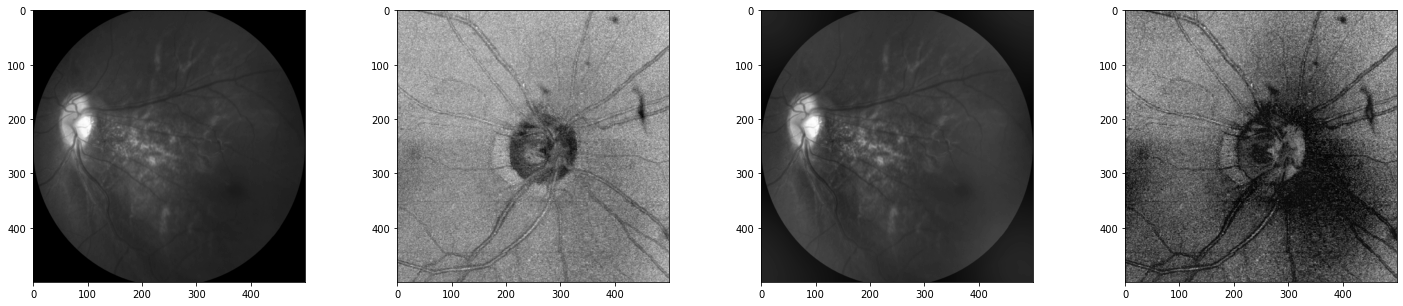

In [13]:
plt.figure()
figure, axis = plt.subplots(1, 4, figsize=(25, 5))
i = 0

axis[i].imshow(cv2.cvtColor(source_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(target_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(adapted_im.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(adapted_im2.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

In [3]:
# histogram matching, colour matching, intensity matching, ...

# Style Transfer Using Texture Synthesis

In [4]:
# https://arxiv.org/pdf/1609.03057.pdf https://github.com/DarkGeekMS/artistic-style-transfer-using-texture-synthesis/blob/master/src/style_transfer.py

start style transfer
colour change done
seg mask done
pyramid done
Running on layer 0
Running on layer 1
Running on layer 2


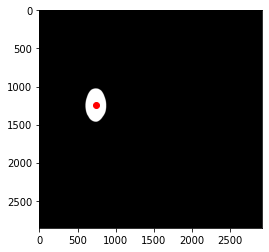

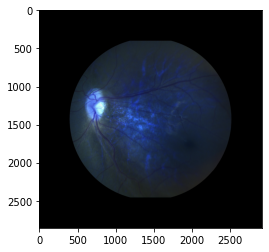

In [9]:
import numpy as np
import cv2
from timeit import default_timer
# from sklearn.feature_extraction.image import extract_patches_2d

from sklearn.feature_extraction.image import extract_patches_2d as extract_patches

from skimage.util import view_as_windows, random_noise
from sklearn.neighbors import NearestNeighbors

from art2 import *
from art2.style_transfer import *
from art2.pca_nn import * 

import cv2

from skimage.transform import rescale, resize, downscale_local_mean

#source_im = cv2.imread('example_data/AMD/A0001.jpg') 
#source_im = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\images_Non-AMD\N0067.jpg') # example_data/nonAMD/N0002.jpg') 
#source_im = cv2.imread('example_data/texture/ple.tif')
#source_im = cv2.imread('example_data/texture/cir.tif')
target_im = cv2.imread('example_data/texture/cir.tif')
#target_im = cv2.imread('example_data/texture/ple.tif')


source_im = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\images_Non-AMD\N0066.jpg')
fundus = source_im
gray = (0,0,0) # fundus.mean(axis=0).mean(axis=0)

fundus = cv2.copyMakeBorder(fundus, 400, 400, 400, 400, cv2.BORDER_CONSTANT, None, value = gray)

fundus[np.where((fundus==[0,0,0]).all(axis=2))] = gray

mask = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\Disc_Masks_bin\N0066.bmp')
mask = cv2.copyMakeBorder(mask, 400, 400, 400, 400, cv2.BORDER_REPLICATE)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
num_labels, labels_im = cv2.findContours(mask, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)    
if len(num_labels) > 0:
    max_area = max(num_labels, key = cv2.contourArea)
    cv2.drawContours(mask,[max_area],0,255,-1)
    # print(max_area)
# calculate moments of binary image
M = cv2.moments(mask)
# calculate x, y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


plt.figure()
plt.imshow(mask, cmap="gray")
plt.plot(cX, cY, 'ro', lw=3) 

#print(cX)
#print(cY)
#cX-300:cY+300,cX-300:cY+300

plt.figure()
plt.imshow(fundus, cmap="gray")


#source_im = fundus[cY-700:cY+700, cX-700:cX+700]


source_im = cv2.resize(source_im, (500, 500), interpolation = cv2.INTER_AREA) # structure
target_im = cv2.resize(target_im, (500, 500), interpolation = cv2.INTER_AREA) # style 

t = target_im.copy()
t[:,:,0] = t[:,:,0] * 1.1
t[:,:,1] = t[:,:,2] * 0.9


output_img = source_im

output_img = style_transfer(source_im, t, num_pyramid_layers=3, patch_sizes=(100, 50, 30), patch_spacings=(10, 10, 10), num_iters=10, num_irls_iters=10, max_pixel_val=254)

# output_img = style_transfer(source_im, t, num_pyramid_layers=3, patch_sizes=(50, 40, 30), patch_spacings=(10, 10, 10), num_iters=3, num_irls_iters=10, max_pixel_val=255)
# num_pyramid_layers=3, patch_sizes=(33, 21, 13, 9), patch_spacings=(28, 18, 8, 5), num_iters=3, num_irls_iters=10, max_pixel_val=255

<Figure size 432x288 with 0 Axes>

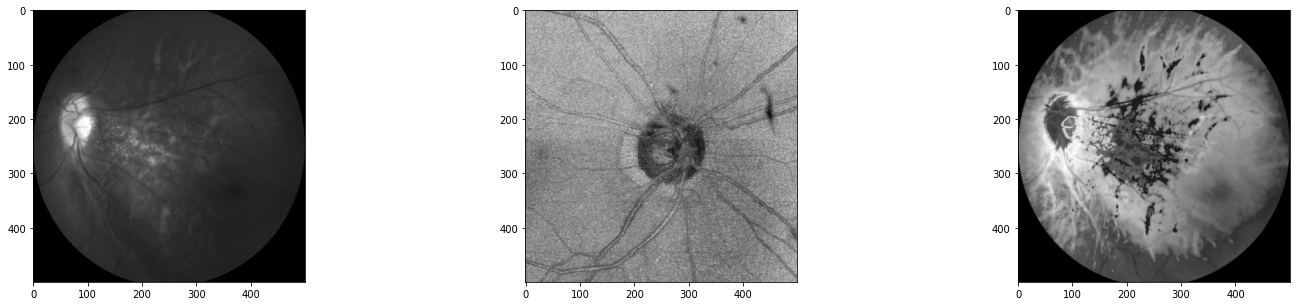

In [10]:
# rgb2gray(output_img.astype(int))
plt.figure()
figure, axis = plt.subplots(1, 3, figsize=(25, 5))
i = 0

axis[i].imshow(cv2.cvtColor(source_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(target_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(output_img.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

#axis[i].imshow(rgb2gray(output_img.astype(np.uint8) ), cmap="gray")
#i+=1



